In [1]:
!pip install komm

     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56607 sha256=d5d544b6e1d87a1e112b96837cdb0c7afba5ee3c623d2814cd81a13136225f52
  Stored in directory: /root/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built komm


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import komm
from numpy.random import randint


SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.allclose
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [12, 8]

In [11]:
samples_per_symbol = 8              # Upsampling factor
Nsym = 6                            # Filter span in symbol duration
alpha = 0                         # Roll-off factor

DataL = 50                              # Data length in symbols
R = 2000                                 # Data rate (how many samples per sec)
Fs = R*samples_per_symbol               # Sampling frequency

x_input = 2* randint(0,2,DataL)-1       # input random data
tx = 1000 * np.arange(0,DataL)/R        # time axis for the symbols (in msec)

# Filter the sequence of symbols with the filter
pulse = komm.RaisedCosinePulse(rolloff = alpha, length_in_symbols=Nsym)
imp = pulse.impulse_response #this vector has stored all time domain of pulses in all delays ..., h(t+1), h(t), h(t-1), h(t-2), ...
tx_filter = komm.TransmitFilter(pulse, samples_per_symbol=samples_per_symbol)

y0 = tx_filter(x_input)             #this is the signal y(t)
y0 = y0[:-samples_per_symbol*2] # we have to truncate the ending part

t0 = 1000 * np.arange(0,(DataL+Nsym/2)*samples_per_symbol)/Fs

# the following lines will filter group delay, since raised cosine filter is linear phase and symmetric
filtDelay = Nsym/(2*R)
y0 = y0[int(filtDelay*Fs):]
t0 = 1000 * np.arange(0,DataL*samples_per_symbol)/Fs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


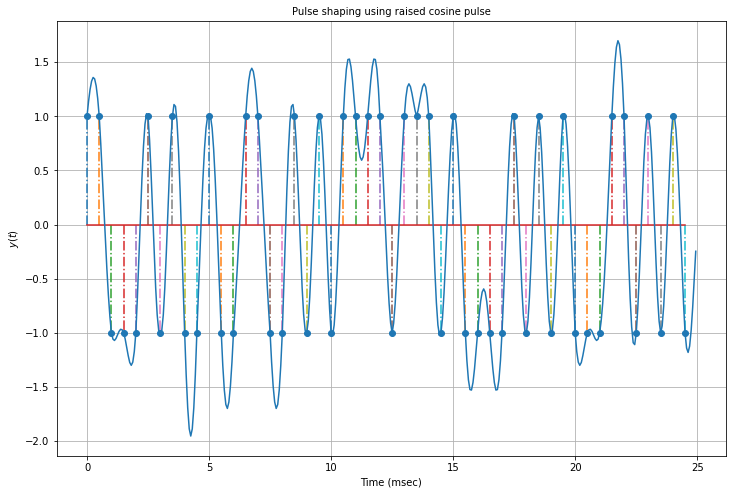

In [12]:
# plot the digital signal
plt.figure
ax = plt.subplot(111)
ax.stem(tx,x_input, '-.')

# plot the pulse modified signal
ax= plt.subplot(111)
plt.plot(t0,y0)
plt.grid()
plt.title('Pulse shaping using raised cosine pulse')
plt.xlabel('Time (msec)')
plt.ylabel('$y(t)$')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


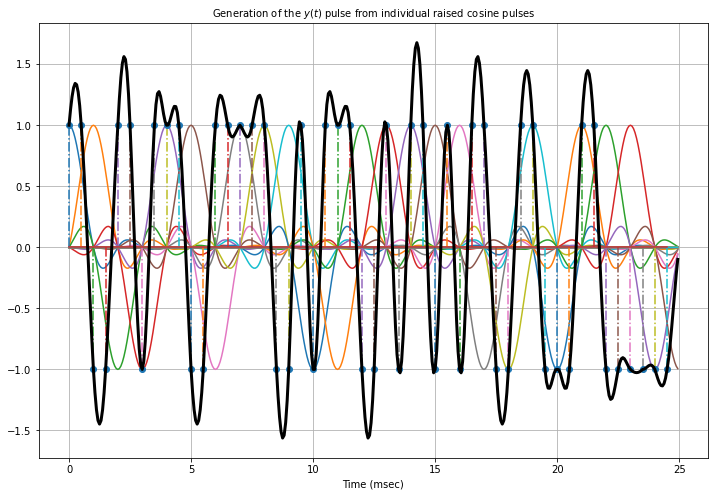

In [8]:
plt.figure
ax = plt.subplot(111)

for k, a in enumerate(x_input):
    ax.plot(t0, a*pulse.impulse_response(t0 - k))
ax.stem(tx,x_input, '-.')
ax.plot(t0,y0,'k', linewidth = 3)
plt.xlabel('Time (msec)')
plt.grid()
plt.title('Generation of the $y(t)$ pulse from individual raised cosine pulses')
plt.show()